### FE: Analisis de Descripciones + titulo

In [1]:
import pandas as pd
df = pd.read_csv("./train.csv")

#### Vemos que hay nulos pero son muy pocos en comparacion a todos los anuncios que hay

In [2]:
x = df['titulo'].isna().sum() / df['titulo'].size * 100
print("Porcentaje de Nulidad: "+ str(x) + "%")

Porcentaje de Nulidad: 2.2445833333333334%


#### Entonces nos atrevemos a encontrar posibles valores repetidos en el titulo que puedan ser features escondidas, éstas son las funciones a utilizar

### OPTIMIZACION DE LAS FUNCIONES EMPLEADAS

In [3]:
def contar_palabras(titulo, palabras):
    
    contadas = 0
    
    for palabra in palabras:
        spliteado = titulo.split()
        contadas += spliteado.count(palabra)
        
    return contadas

In [4]:
def normalizar_descripciones(descripcion):
    
    descripcion = descripcion.replace(',', ' ')
    descripcion = descripcion.replace('.', ' ')
    descripcion = descripcion.replace('<', ' ')
    descripcion = descripcion.replace('>', ' ')
    descripcion = descripcion.replace('\n', ' ')
    descripcion = descripcion.replace('\strong', ' ')
    descripcion = descripcion.replace('\bold', ' ')
    descripcion = descripcion.lower()
    
    return descripcion

#### Hay que remover los nulos y aplicar la normalizacion primero

In [5]:
df['titulo'] = df['titulo'].fillna(value = ".")
df['titulo'] = df['titulo'].apply(normalizar_descripciones)
df['descripcion'] = df['descripcion'].fillna(value = ".")
df['descripcion'] = df['descripcion'].apply(normalizar_descripciones)

### - COMIENZA ANALISIS -

In [6]:
df['calefaccion'] = df['titulo'].apply(contar_palabras, palabras=["calefaccion", "calefacción", "calefaccionado", "aireacondicinado",
                    "acondicionado", "estufa","chimenea"]) +df['descripcion'].apply(contar_palabras, palabras=["calefaccion", 
                    "calefacción", "calefaccionado", "aireacondicinado", "acondicionado", "estufa","chimenea"])

df.calefaccion.value_counts()

0    222721
1     14962
2      1964
3       288
4        44
5        20
6         1
Name: calefaccion, dtype: int64

In [7]:
df['suite'] = df['titulo'].apply(contar_palabras, palabras=["suite"])+df['descripcion'].apply(contar_palabras, palabras=["suite"])
df['suite'].value_counts()

0    239511
1       387
2        80
3        18
5         2
4         2
Name: suite, dtype: int64

In [8]:
df['avenida'] = df['titulo'].apply(contar_palabras, palabras=["avenida", "av", "avenidas", "bulevar", 
               "boulevard", "paseo", "vía"])+df['descripcion'].apply(contar_palabras, palabras=["avenida", "av", 
                "avenidas", "bulevar","boulevard", "paseo", "vía"])

df.avenida.value_counts()

0     213324
1      21084
2       4459
3        785
4        228
5         66
6         36
8          7
7          4
11         2
10         2
9          2
23         1
Name: avenida, dtype: int64

In [9]:
df['gim'] = df['titulo'].apply(contar_palabras, palabras=["gimnasio", "gimnásio", "entrenamiento", "gim", "gym", "fit",
            "ejercicio", "gimnasia","atletismo", "cancha"])+df['descripcion'].apply(contar_palabras, palabras=["gimnasio",
            "gimnásio", "entrenamiento", "gim", "gym", "fit","ejercicio", "gimnasia","atletismo", "cancha"])
df.gim.value_counts()

0    223555
1     13619
2      2301
3       430
4        81
5        12
6         2
Name: gim, dtype: int64

In [10]:
#Original
df['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [11]:
df['cochera'] = df['titulo'].apply(contar_palabras, palabras=["cochera", "cocheras", "garage", 
                "garages", "garaje", "garajes"])+df['descripcion'].apply(contar_palabras, palabras=["cochera", 
                "cocheras", "garage","garages", "garaje", "garajes"])

df.cochera.value_counts()

0     180535
1      56273
2       2910
3        232
4         39
6          7
5          3
12         1
Name: cochera, dtype: int64

In [12]:
#Original
df.garages.value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [13]:
df['ubicacion'] = df['titulo'].apply(contar_palabras, palabras=["ubicacion", "ubicación", "locacion", 
                "locación", "localizacion", "localización","ubicado", "ubicada", "centro", "centrico",
                "centrica", "céntrico", "céntrica","central"])+df['descripcion'].apply(contar_palabras, palabras=["ubicacion", "ubicación", "locacion", 
                "locación", "localizacion", "localización","ubicado", "ubicada", "centro", "centrico",
                "centrica", "céntrico", "céntrica","central"])

df.ubicacion.value_counts()

0     160432
1      62015
2      14002
3       2764
4        601
5        133
6         29
7         11
8          8
10         4
13         1
Name: ubicacion, dtype: int64

In [14]:
df['balcon'] = df['titulo'].apply(contar_palabras, palabras=["balcon", "balcón", "terraza", "palco", "mirador", 
            "balconcillo","azotea", "solana"])+df['descripcion'].apply(contar_palabras, palabras=["balcon", "balcón", 
            "terraza", "palco", "mirador", "balconcillo","azotea", "solana"])

df.balcon.value_counts()

0     188223
1      41437
2       8167
3       1590
4        372
5        141
6         43
7          9
8          7
9          5
10         3
18         1
13         1
12         1
Name: balcon, dtype: int64

In [15]:
df['camaraseg'] = df['titulo'].apply(contar_palabras, palabras=["camara", "cámara", "cámaras", "camaras","seguridad",
                "guardia","seguro","protegido"]) + df['descripcion'].apply(contar_palabras, palabras=["camara", "cámara",
                "cámaras", "camaras","seguridad","guardia","seguro","protegido"])

df.camaraseg.value_counts()

0    219632
1     17766
2      2224
3       299
4        51
5        26
6         2
Name: camaraseg, dtype: int64

In [16]:
df['parque'] = df['titulo'].apply(contar_palabras, palabras=["parque", "plaza", "plazoleta", "glorieta","jardin",
            "jardín","patio"])+df['descripcion'].apply(contar_palabras, palabras=["parque", "plaza", "plazoleta", 
            "glorieta","jardin","jardín","patio"])

df.parque.value_counts()

0     134614
1      74816
2      23018
3       5584
4       1402
5        387
6        109
7         35
8         19
9          5
10         4
11         3
12         2
14         1
13         1
Name: parque, dtype: int64

In [17]:
df['amoblado'] = df['titulo'].apply(contar_palabras, palabras=["muebles", "amoblado", "mueble","decorado",
                "listo"]) + df['descripcion'].apply(contar_palabras, palabras=["muebles", "amoblado", "mueble",
                "decorado","listo"])

df.amoblado.value_counts()

0     231733
1       7506
2        632
3         99
4         12
5          9
6          7
11         1
9          1
Name: amoblado, dtype: int64

In [18]:
df['bañera'] = df['titulo'].apply(contar_palabras, palabras=["bañera", "hidromasaje", "hidro", "tina",
            "jacuzzi","jacuzi","yacuzi"]) + df['descripcion'].apply(contar_palabras, palabras=["bañera", "hidromasaje", 
            "hidro", "tina","jacuzzi","jacuzi","yacuzi"])

df.bañera.value_counts()

0    225895
1     11484
2      2408
3       153
4        52
5         5
6         3
Name: bañera, dtype: int64

In [19]:
df['estreno'] = df['titulo'].apply(contar_palabras, palabras=["nuevo", "nueva", "estrenar","estreno",
            "innovador"]) + df['descripcion'].apply(contar_palabras, palabras=["nuevo", "nueva", "estrenar","estreno",
            "innovador"])

df.estreno.value_counts()

0    212177
1     21346
2      5628
3       688
4       125
5        23
6         9
9         2
8         2
Name: estreno, dtype: int64

In [20]:
df['transporte'] = df['titulo'].apply(contar_palabras, palabras=["subte", "subterraneo", "subterráneo","metro", 
                "estacion", "estación", "tren","subestacion", "subestación", "ferrocarril","metrobús", "metrobus", 
                "trolebus","trolebús", "bus", "bús"]) + df['descripcion'].apply(contar_palabras, palabras=["subte", 
                "subterraneo", "subterráneo","metro", "estacion", "estación", "tren","subestacion", "subestación", 
                "ferrocarril","metrobús", "metrobus", "trolebus","trolebús", "bus", "bús"])

df.transporte.value_counts()

0    231626
1      6117
2      1811
3       334
4        87
5        18
6         7
Name: transporte, dtype: int64

In [21]:
df['pileta'] = df['titulo'].apply(contar_palabras, palabras=["piscina", "pileta", "nado"])+ df['descripcion'].apply(contar_palabras, palabras=["piscina", "pileta", "nado"])
                                       
df.piscina.value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [22]:
df['lujo'] = df['titulo'].apply(contar_palabras, palabras=["lujo", "delujo", "deluxe", "delúxe", "lujosa", "lujoso", 
            "lujosas", "lujosos","exclusivo","vip"]) + df['descripcion'].apply(contar_palabras, palabras=["lujo", 
            "delujo","deluxe", "delúxe", "lujosa", "lujoso", "lujosas", "lujosos","exclusivo","vip"])
df['lujo'].value_counts()

0    221551
1     14852
2      2908
3       498
4       140
5        34
6        10
7         5
9         1
8         1
Name: lujo, dtype: int64

In [23]:
df['humilde'] = df['titulo'].apply(contar_palabras, palabras=["humilde", "economico", "economica", 
            "económico", "económica", "barata", "barato", "accesible", "baratillo",
            "baratilla", "rebajado", "ganga", "asequible", "módico", "módica","credito","crédito","oferta","oferton",
            "imperdible"]) + df['descripcion'].apply(contar_palabras, palabras=["humilde", "economico", "economica", 
            "económico", "económica", "barata", "barato", "accesible", "baratillo",
            "baratilla", "rebajado", "ganga", "asequible", "módico", "módica",
            "credito","crédito","oferta","oferton","imperdible"]) 

df['humilde'].value_counts()

0    221083
1     16374
2      2101
3       345
4        74
5        16
6         6
7         1
Name: humilde, dtype: int64

In [24]:
df['ventana'] = df['titulo'].apply(contar_palabras, palabras=["ventana", "ventanas", 
            "vista", "ventanal","vistas","cristal"]) + df['descripcion'].apply(contar_palabras, palabras=["ventana",
            "ventanas", "vista", "ventanal","vistas","cristal"])

df['ventana'].value_counts()

0     203157
1      28487
2       6163
3       1450
4        432
5        157
6         77
7         37
8         22
9         10
15         4
10         3
12         1
Name: ventana, dtype: int64

In [25]:
df['nuevo'] = df['titulo'].apply(contar_palabras, palabras=["reciente", "recien", "recién", "nueva", "nuevo", "nuevas", 
            "nuevos", "estrenar"]) + df['descripcion'].apply(contar_palabras, palabras=["reciente", "recien", "recién", 
            "nueva", "nuevo", "nuevas", "nuevos", "estrenar"])

df['nuevo'].value_counts()

0     204985
1      26102
2       7413
3       1100
4        297
5         64
6         17
7         10
8          6
9          3
15         1
11         1
10         1
Name: nuevo, dtype: int64

In [26]:
df['luz'] = df['titulo'].apply(contar_palabras, palabras=["luz", "luminoso", "luminosa","claridad", "luminiscencia", 
        "luminosidad", "iluminación","iluminacion"]) + df['descripcion'].apply(contar_palabras, palabras=["luz", 
        "luminoso", "luminosa","claridad", "luminiscencia","luminosidad", "iluminación","iluminacion"])

df['luz'].value_counts()

0    223666
1     15024
2      1090
3       177
4        28
5         9
6         6
Name: luz, dtype: int64

In [27]:
df['bueno'] = df['titulo'].apply(contar_palabras, palabras=["bueno", "buena", "buenas", "buenos","excelente", 
            "excelentes","increible","espectacular"]) + df['descripcion'].apply(contar_palabras, palabras=["bueno", 
            "buena", "buenas", "buenos","excelente", "excelentes","increible","espectacular"])

df['bueno'].value_counts()

0    151183
1     66130
2     18295
3      3573
4       664
5       115
6        31
7         8
9         1
Name: bueno, dtype: int64

In [28]:
#df['malo'] = df['titulo'].apply(contar_palabras, palabras=["malo", "mala", "feo", "fea"])

#df['malo'].value_counts()

In [29]:
df['contable'] = df['titulo'].apply(contar_palabras, palabras=["precio"]) + df['descripcion'].apply(contar_palabras, palabras=["precio"])

df['contable'].value_counts()

0     218357
1      18553
2       2534
3        410
4        103
5         20
6         10
10         3
8          3
26         1
16         1
14         1
12         1
11         1
9          1
7          1
Name: contable, dtype: int64

In [30]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [31]:
def mi_split (df):

    X = df.drop(['precio'], axis = 1)
    Y = df['precio']
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.35)
    return x_train, x_test, y_train, y_test

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn import preprocessing

def minmax(serie):
    
    return (serie-serie.min())/(serie.max()-serie.min())

def mean_target_encoding(train, nombrefeat, nombretarget):
    
    temp = train.groupby(nombrefeat)[nombretarget].transform(np.mean)
    train[nombrefeat + "_mean"]=(temp-temp.min())/(temp.max()-temp.min())
    
    return train

def mean_target_decoding(x_test, nombrefeat, x_train):
    
    nombrefeatmean = nombrefeat + "_mean"
    
    temp = x_train.loc[:,[nombrefeat,nombrefeatmean]]
    temp = temp.set_index(nombrefeat)
    temp = temp.drop_duplicates()
    temp = temp.T.squeeze()
    values = x_test[nombrefeat].map(temp)
    x_test[nombrefeatmean] = values 

    return x_test

def armar_set_2(train):
    
    #Puedo resolver de forma general las que son iguales para train y test
    #es decir, aquellas que no filtran informacion a los de validacion
    
    train = train.drop(['descripcion', 'titulo', 'direccion', 'fecha', 'id'], axis = 1)
    
    #Adiciono servicios
    train['servicios'] = train['piscina'] + train['gimnasio'] + train['usosmultiples']
    
    #"Normalizo" la antiguedad
    #train['antiguedad'] = minmax(train['antiguedad'])
    
    #Elimino los residuos
    train = train.drop(['piscina', 'gimnasio','usosmultiples','escuelascercanas', 
                        'centroscomercialescercanos'], axis = 1)
    
    #Hago el split                    
    x_train, x_test, y_train, y_test = mi_split(train)
        
    x_train["precio"] = y_train

    
    #Calculo los mean target
    x_train_mean = mean_target_encoding(x_train, "provincia", "precio")
    x_train_mean['precio'] = y_train
    x_train_mean = mean_target_encoding(x_train_mean, "tipodepropiedad", "precio")
    x_train_mean = mean_target_encoding(x_train_mean, "ciudad", "precio")
    
    #Se los asigno a los test (NO LOS CALCULO CON ELLOS!!!!!!)
    x_test = mean_target_decoding(x_test, "provincia", x_train_mean)
    x_test = mean_target_decoding(x_test, "tipodepropiedad", x_train_mean)
    x_test = mean_target_decoding(x_test, "ciudad", x_train_mean)

    backup = x_train_mean
    
    x_train = x_train_mean.drop(["precio","provincia","tipodepropiedad","ciudad"], axis=1)
    x_test.drop(["provincia","tipodepropiedad", "ciudad"], axis=1, inplace = True)

    
    return x_train, x_test, y_train, y_test, backup

In [259]:
dfreducido = df.dropna()
x_train, x_test, y_train, y_test, backup = armar_set_2(dfreducido)

X,y = x_train, y_train
selector = SelectKBest(k='all').fit(X,y)
x_new = selector.transform(X)
scores = selector.scores_
columnas = x_train.columns

Text(0, 0.5, 'Score')

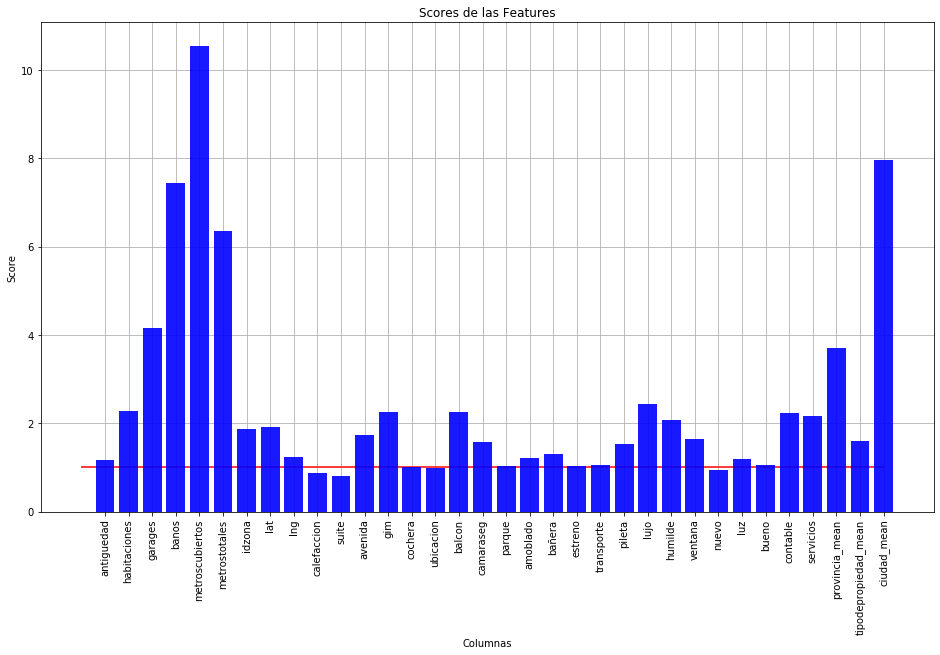

In [260]:
k_utilizado = np.arange(columnas.size)+1


plt.grid()
plt.bar(k_utilizado, scores, color = 'blue', align='center', alpha=0.9, zorder =3)
plt.xticks(k_utilizado, columnas, rotation=90)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.hlines(1, xmin=0, xmax = 34,colors='red', linestyles='solid', label='')
plt.title("Scores de las Features")
plt.xlabel("Columnas")
plt.ylabel("Score")

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test, backup = armar_set_2(df)

In [33]:
#Armo modelo

xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eval_metric='mae',
             gamma=0.015, importance_type='gain', learning_rate=0.026,
             max_delta_step=0, max_depth=11, min_child_weight=1, missing=None,
             n_estimators=1700, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.733, verbosity=1)


#Fitteo
xgb_model.fit(x_train, y_train)
prediccion = xgb_model.predict(x_test)
#prediccion_anido = (prediccion + prediccion)/2

/home/lorenzo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:53:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
#Estimo MAE
print(mean_absolute_error(y_test, prediccion))

537881.4975730097


### Armo el test

In [35]:
x_test = pd.read_csv("test.csv")

In [36]:
df = x_test

#### Hay que remover los nulos y aplicar la normalizacion primero

In [37]:
df['titulo'] = df['titulo'].fillna(value = ".")
df['titulo'] = df['titulo'].apply(normalizar_descripciones)
df['descripcion'] = df['descripcion'].fillna(value = ".")
df['descripcion'] = df['descripcion'].apply(normalizar_descripciones)

### - COMIENZA ANALISIS -

In [38]:
df['calefaccion'] = df['titulo'].apply(contar_palabras, palabras=["calefaccion", "calefacción", "calefaccionado", "aireacondicinado",
                    "acondicionado", "estufa","chimenea"]) +df['descripcion'].apply(contar_palabras, palabras=["calefaccion", 
                    "calefacción", "calefaccionado", "aireacondicinado", "acondicionado", "estufa","chimenea"])

df.calefaccion.value_counts()

0    55621
1     3825
2      469
3       61
4       17
5        5
6        2
Name: calefaccion, dtype: int64

In [39]:
df['suite'] = df['titulo'].apply(contar_palabras, palabras=["suite"])
df['suite'].value_counts()

0    59985
1       15
Name: suite, dtype: int64

In [40]:
df['avenida'] = df['titulo'].apply(contar_palabras, palabras=["avenida", "av", "avenidas", "bulevar", 
               "boulevard", "paseo", "vía"])+df['descripcion'].apply(contar_palabras, palabras=["avenida", "av", 
                "avenidas", "bulevar","boulevard", "paseo", "vía"])

df.avenida.value_counts()

0     53384
1      5203
2      1111
3       220
4        48
5        18
6         7
7         5
8         2
10        1
9         1
Name: avenida, dtype: int64

In [41]:
df['gim'] = df['titulo'].apply(contar_palabras, palabras=["gimnasio", "gimnásio", "entrenamiento", "gim", "gym", "fit",
            "ejercicio", "gimnasia","atletismo", "cancha"])+df['descripcion'].apply(contar_palabras, palabras=["gimnasio",
            "gimnásio", "entrenamiento", "gim", "gym", "fit","ejercicio", "gimnasia","atletismo", "cancha"])
df.gim.value_counts()

0    55877
1     3394
2      589
3      111
4       22
5        7
Name: gim, dtype: int64

In [42]:
df['cochera'] = df['titulo'].apply(contar_palabras, palabras=["cochera", "cocheras", "garage", 
                "garages", "garaje", "garajes"])+df['descripcion'].apply(contar_palabras, palabras=["cochera", 
                "cocheras", "garage","garages", "garaje", "garajes"])

df.cochera.value_counts()

0    45221
1    14028
2      683
3       56
4       10
6        1
5        1
Name: cochera, dtype: int64

In [43]:
df['ubicacion'] = df['titulo'].apply(contar_palabras, palabras=["ubicacion", "ubicación", "locacion", 
                "locación", "localizacion", "localización","ubicado", "ubicada", "centro", "centrico",
                "centrica", "céntrico", "céntrica","central"])+df['descripcion'].apply(contar_palabras, palabras=["ubicacion", "ubicación", "locacion", 
                "locación", "localizacion", "localización","ubicado", "ubicada", "centro", "centrico",
                "centrica", "céntrico", "céntrica","central"])

df.ubicacion.value_counts()

0    40089
1    15556
2     3476
3      657
4      180
5       28
6        8
8        3
7        2
9        1
Name: ubicacion, dtype: int64

In [44]:
df['balcon'] = df['titulo'].apply(contar_palabras, palabras=["balcon", "balcón", "terraza", "palco", "mirador", 
            "balconcillo","azotea", "solana"])+df['descripcion'].apply(contar_palabras, palabras=["balcon", "balcón", 
            "terraza", "palco", "mirador", "balconcillo","azotea", "solana"])

df.balcon.value_counts()

0     47163
1     10224
2      2032
3       419
4       108
5        35
6        10
8         4
10        2
7         2
12        1
Name: balcon, dtype: int64

In [45]:
df['camaraseg'] = df['titulo'].apply(contar_palabras, palabras=["camara", "cámara", "cámaras", "camaras","seguridad",
                "guardia","seguro","protegido"]) + df['descripcion'].apply(contar_palabras, palabras=["camara", "cámara",
                "cámaras", "camaras","seguridad","guardia","seguro","protegido"])

df.camaraseg.value_counts()

0    54879
1     4450
2      555
3       88
4       18
5        9
8        1
Name: camaraseg, dtype: int64

In [46]:
df['parque'] = df['titulo'].apply(contar_palabras, palabras=["parque", "plaza", "plazoleta", "glorieta","jardin",
            "jardín","patio"])+df['descripcion'].apply(contar_palabras, palabras=["parque", "plaza", "plazoleta", 
            "glorieta","jardin","jardín","patio"])

df.parque.value_counts()

0     33457
1     18895
2      5775
3      1403
4       327
5        89
6        37
7         7
8         4
9         3
18        1
11        1
10        1
Name: parque, dtype: int64

In [47]:
df['amoblado'] = df['titulo'].apply(contar_palabras, palabras=["muebles", "amoblado", "mueble","decorado",
                "listo"]) + df['descripcion'].apply(contar_palabras, palabras=["muebles", "amoblado", "mueble",
                "decorado","listo"])

df.amoblado.value_counts()

0    58002
1     1803
2      155
3       26
4        7
5        6
6        1
Name: amoblado, dtype: int64

In [48]:
df['bañera'] = df['titulo'].apply(contar_palabras, palabras=["bañera", "hidromasaje", "hidro", "tina",
            "jacuzzi","jacuzi","yacuzi"]) + df['descripcion'].apply(contar_palabras, palabras=["bañera", "hidromasaje", 
            "hidro", "tina","jacuzzi","jacuzi","yacuzi"])

df.bañera.value_counts()

0    56553
1     2808
2      579
3       45
4       12
5        2
6        1
Name: bañera, dtype: int64

In [49]:
df['estreno'] = df['titulo'].apply(contar_palabras, palabras=["nuevo", "nueva", "estrenar","estreno",
            "innovador"]) + df['descripcion'].apply(contar_palabras, palabras=["nuevo", "nueva", "estrenar","estreno",
            "innovador"])

df.estreno.value_counts()

0    53134
1     5322
2     1320
3      187
4       32
5        5
Name: estreno, dtype: int64

In [50]:
df['transporte'] = df['titulo'].apply(contar_palabras, palabras=["subte", "subterraneo", "subterráneo","metro", 
                "estacion", "estación", "tren","subestacion", "subestación", "ferrocarril","metrobús", "metrobus", 
                "trolebus","trolebús", "bus", "bús"]) + df['descripcion'].apply(contar_palabras, palabras=["subte", 
                "subterraneo", "subterráneo","metro", "estacion", "estación", "tren","subestacion", "subestación", 
                "ferrocarril","metrobús", "metrobus", "trolebus","trolebús", "bus", "bús"])

df.transporte.value_counts()

0    57826
1     1596
2      466
3       86
4       18
5        4
7        2
9        1
6        1
Name: transporte, dtype: int64

In [51]:
df['pileta'] = df['titulo'].apply(contar_palabras, palabras=["piscina", "pileta", "nado"])+ df['descripcion'].apply(contar_palabras, palabras=["piscina", "pileta", "nado"])
                                       
df.piscina.value_counts()

0.0    54704
1.0     5296
Name: piscina, dtype: int64

In [52]:
df['lujo'] = df['titulo'].apply(contar_palabras, palabras=["lujo", "delujo", "deluxe", "delúxe", "lujosa", "lujoso", 
            "lujosas", "lujosos","exclusivo","vip"]) + df['descripcion'].apply(contar_palabras, palabras=["lujo", 
            "delujo","deluxe", "delúxe", "lujosa", "lujoso", "lujosas", "lujosos","exclusivo","vip"])
df['lujo'].value_counts()

0    55308
1     3738
2      791
3      125
4       30
5        6
8        2
Name: lujo, dtype: int64

In [53]:
df['humilde'] = df['titulo'].apply(contar_palabras, palabras=["humilde", "economico", "economica", 
            "económico", "económica", "barata", "barato", "accesible", "baratillo",
            "baratilla", "rebajado", "ganga", "asequible", "módico", "módica","credito","crédito","oferta","oferton",
            "imperdible"]) + df['descripcion'].apply(contar_palabras, palabras=["humilde", "economico", "economica", 
            "económico", "económica", "barata", "barato", "accesible", "baratillo",
            "baratilla", "rebajado", "ganga", "asequible", "módico", "módica",
            "credito","crédito","oferta","oferton","imperdible"]) 

df['humilde'].value_counts()

0    55358
1     4006
2      517
3       98
4       19
5        2
Name: humilde, dtype: int64

In [54]:
df['ventana'] = df['titulo'].apply(contar_palabras, palabras=["ventana", "ventanas", 
            "vista", "ventanal","vistas","cristal"]) + df['descripcion'].apply(contar_palabras, palabras=["ventana",
            "ventanas", "vista", "ventanal","vistas","cristal"])

df['ventana'].value_counts()

0     50706
1      7180
2      1582
3       340
4       111
5        41
6        20
7        13
8         4
22        1
17        1
14        1
Name: ventana, dtype: int64

In [55]:
df['nuevo'] = df['titulo'].apply(contar_palabras, palabras=["reciente", "recien", "recién", "nueva", "nuevo", "nuevas", 
            "nuevos", "estrenar"]) + df['descripcion'].apply(contar_palabras, palabras=["reciente", "recien", "recién", 
            "nueva", "nuevo", "nuevas", "nuevos", "estrenar"])

df['nuevo'].value_counts()

0     51316
1      6521
2      1786
3       282
4        61
5        24
6         4
7         3
10        2
8         1
Name: nuevo, dtype: int64

In [56]:
df['luz'] = df['titulo'].apply(contar_palabras, palabras=["luz", "luminoso", "luminosa","claridad", "luminiscencia", 
        "luminosidad", "iluminación","iluminacion"]) + df['descripcion'].apply(contar_palabras, palabras=["luz", 
        "luminoso", "luminosa","claridad", "luminiscencia","luminosidad", "iluminación","iluminacion"])

df['luz'].value_counts()

0    55893
1     3762
2      287
3       42
4       11
5        5
Name: luz, dtype: int64

In [57]:
df['bueno'] = df['titulo'].apply(contar_palabras, palabras=["bueno", "buena", "buenas", "buenos","excelente", 
            "excelentes","increible","espectacular"]) + df['descripcion'].apply(contar_palabras, palabras=["bueno", 
            "buena", "buenas", "buenos","excelente", "excelentes","increible","espectacular"])

df['bueno'].value_counts()

0    37631
1    16646
2     4607
3      918
4      159
5       27
6        8
7        2
9        1
8        1
Name: bueno, dtype: int64

In [58]:
df['contable'] = df['titulo'].apply(contar_palabras, palabras=["precio"]) + df['descripcion'].apply(contar_palabras, palabras=["precio"])

df['contable'].value_counts()

0     54650
1      4595
2       631
3        98
4        15
5         4
6         3
17        1
15        1
12        1
7         1
Name: contable, dtype: int64

In [59]:
x_test = df

In [60]:
#Adiciono servicios
x_test['servicios'] = x_test['piscina'] + x_test['gimnasio'] + x_test['usosmultiples']

#"Normalizo" la antiguedad
#x_train['antiguedad'] = minmax(x_train['antiguedad'])

#Se los asigno a los test (NO LOS CALCULO CON ELLOS!!!!!!)
x_test = mean_target_decoding(x_test, "provincia", backup)
x_test = mean_target_decoding(x_test, "tipodepropiedad", backup)
x_test = mean_target_decoding(x_test, "ciudad", backup)

#Elimino los residuos
x_test = x_test.drop(['piscina', 'gimnasio','usosmultiples','escuelascercanas', 'fecha',
                  'centroscomercialescercanos', 'titulo', 'direccion', 'descripcion',
                  'id'], axis = 1)

########### LIMPIO LOS QUE HICE MEAN ################

x_test.drop(["provincia", "tipodepropiedad","ciudad"], axis=1, inplace = True)

In [61]:
prediccion = xgb_model.predict(x_test)

In [62]:
test_original = pd.read_csv("test.csv")
predicciones = test_original.loc[:, ['id','ciudad']]
predicciones.rename(columns = {'ciudad' : 'target'}, inplace = True)
predicciones['target'] = prediccion
predicciones = predicciones.set_index('id')

In [63]:
predicciones.to_csv(r'prediccionXGBFEmix_opt.csv')